# SevenDiff

*Little projet to detect differences from two images.*

## 0. Import librairies

In [51]:
import cv2 # pip install opencv-python
import matplotlib.pyplot as plt # pip install matplotlib
import numpy as np # installed by default
from skimage.metrics import structural_similarity # pip install scikit-image
import imutils # pip install imutils

## 1. Detect differences with `cv2.absdiff()` method (1st example)

### 1.1. Load image

*We have a picture with two images.*

In [33]:
image = cv2.imread('img/img1.jpg')

### 1.2. Convert BGR (OpenCV format) to RGB (for Matplotlib)

In [34]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

### 1.3. Show image with `matplotlib`

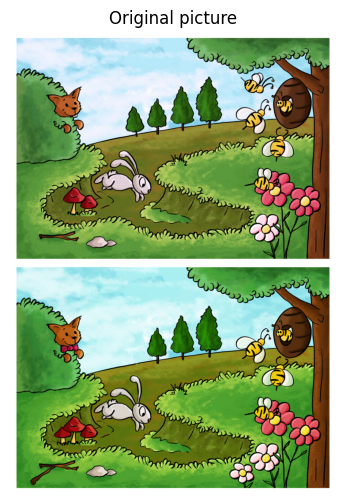

In [35]:
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.title('Original picture')
plt.axis('off')
plt.show()

### 1.4. Show image's dimensions

In [36]:
height, width, _ = image.shape
print(f"Height: {height}\nWidth: {width}")

Height: 1701
Width: 1200


### 1.5. Divide image in two equal parts

In [37]:
mid_height = height//2
img1 = image[:mid_height, :]
img2 = image[mid_height:, :]

**Show dimensions of the first image**

In [38]:
img1.shape

(850, 1200, 3)

**Show dimensions of the second image**

In [39]:
img2.shape

(851, 1200, 3)

*Note: We have height inequality in our images.*

*h = 850 for `img1` and h = 851 for `img2`.*

### 1.6. Show our two images

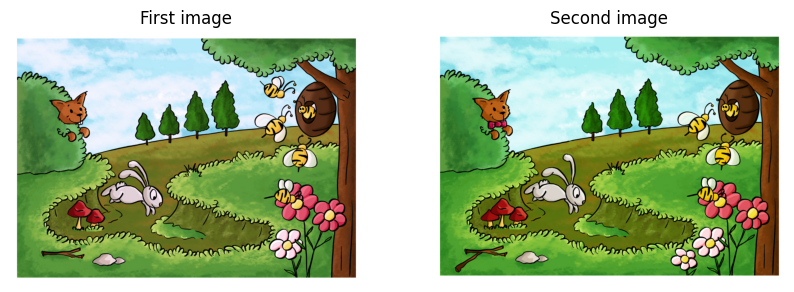

In [40]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.title('Second image')
plt.axis('off')

plt.show()

### 1.7. Equalize the dimensions of our two images

**Create a function to equilze dimensions**

In [41]:
def same_dim(img1, img2):
    height1, width1, _ = img1.shape
    height2, width2, _ = img2.shape

    if height1 > height2:
        img1 = cv2.resize(img1, (width1, height2))
    elif height2 > height1:
        img2 = cv2.resize(img2, (width2, height1))
    return img1, img2

In [42]:
(img1, img2) = same_dim(img1, img2)

In [43]:
img1.shape

(850, 1200, 3)

In [44]:
img2.shape

(850, 1200, 3)

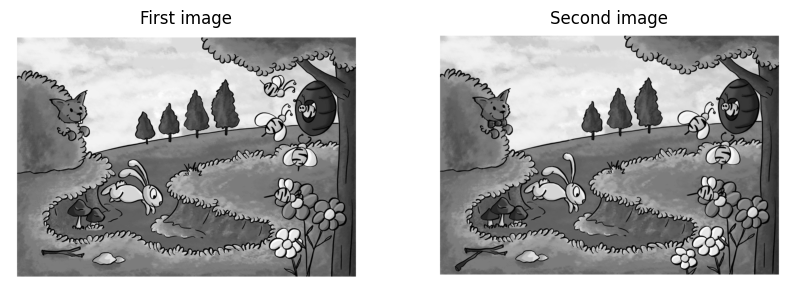

In [45]:
img1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
img2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Second image')
plt.axis('off')

plt.show()

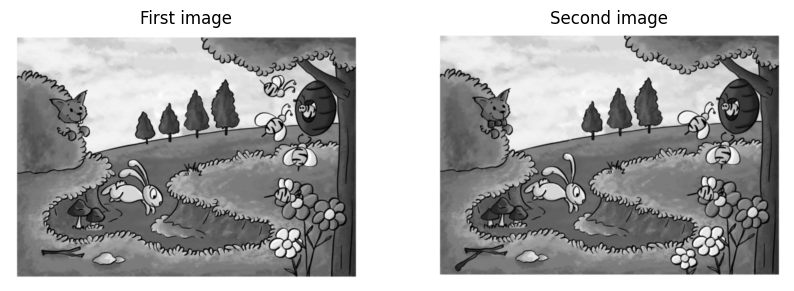

In [46]:
img1 = cv2.GaussianBlur(img1, (5, 5), 0)
img2 = cv2.GaussianBlur(img2, (5, 5), 0)

plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.title('Second image')
plt.axis('off')

plt.show()

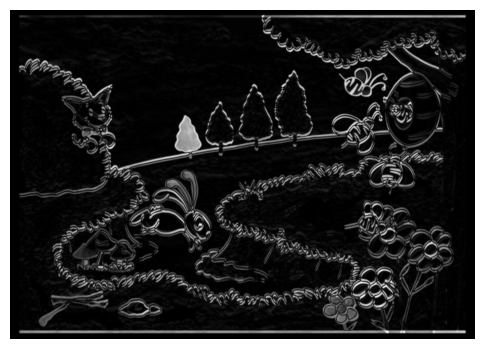

In [47]:
diff = cv2.absdiff(img1, img2)

plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

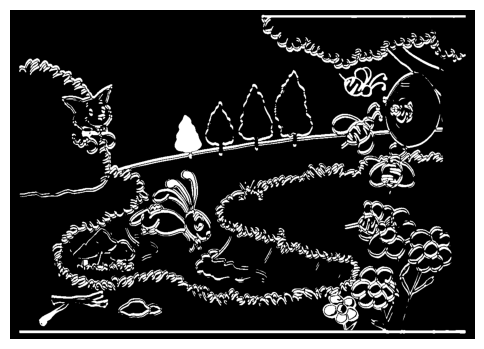

In [55]:
_, thresh = cv2.threshold(diff, 120, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

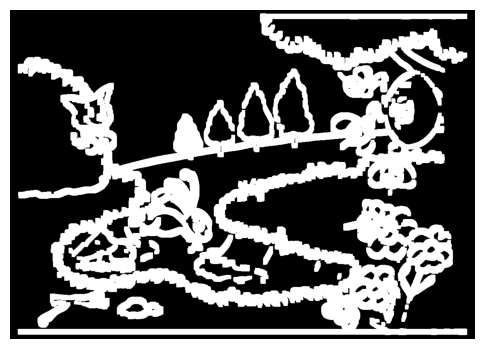

In [56]:
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=2)

plt.figure(figsize=(6, 6))
plt.imshow(dilate, cmap='gray')
plt.axis('off')
plt.show()

In [57]:
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

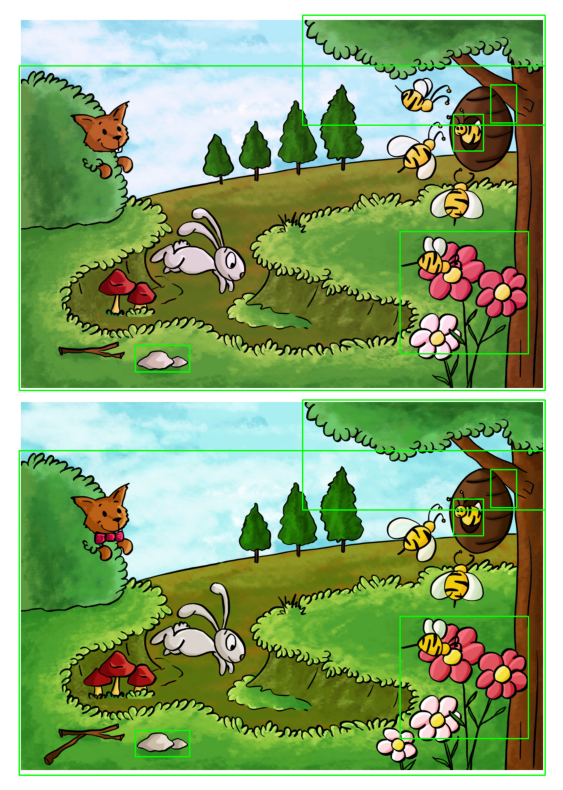

In [58]:
for contour in contours:
    if cv2.contourArea(contour) > 500:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.rectangle(image, (x, y + height//2), (x + w, y + height//2 + h), (0, 255, 0), 2)

plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')
plt.show()

*Note: sucks..*

## 2. Detect differences with `cv2.absdiff()` method (2nd example)

### 2.1. Load images

In [96]:
image1 = cv2.imread('img/img3-1.png')
image2 = cv2.imread('img/img3-2.png')

In [97]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [98]:
blur1 = cv2.GaussianBlur(gray1, (5, 5), 0)
blur2 = cv2.GaussianBlur(gray2, (5, 5), 0)

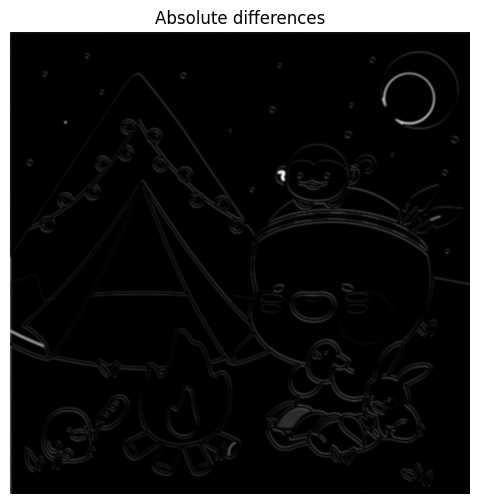

In [99]:
diff = cv2.absdiff(blur1, blur2)

plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.title('Absolute differences')
plt.axis('off')
plt.show()

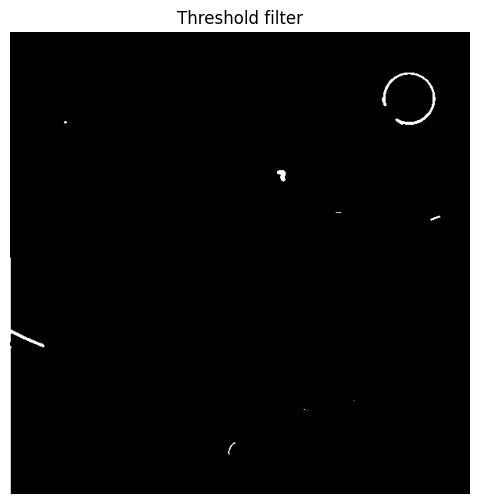

In [100]:
_, thresh = cv2.threshold(diff, 50, 255, cv2.THRESH_BINARY)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.title('Threshold filter')
plt.axis('off')
plt.show()

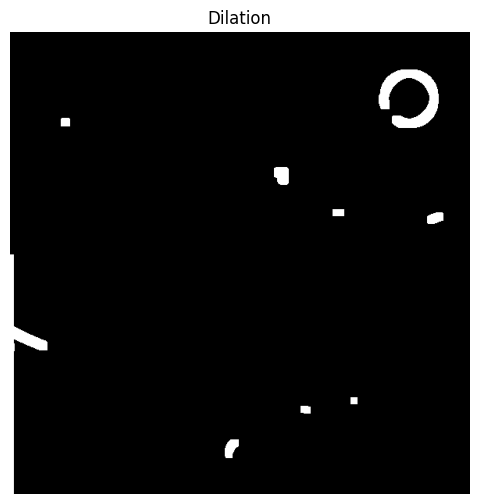

In [101]:
kernel = np.ones((5, 5), np.uint8)
dilate = cv2.dilate(thresh, kernel, iterations=2)

plt.figure(figsize=(6, 6))
plt.imshow(dilate, cmap='gray')
plt.title('Dilation')
plt.axis('off')
plt.show()

In [102]:
contours = cv2.findContours(dilate.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)

In [103]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

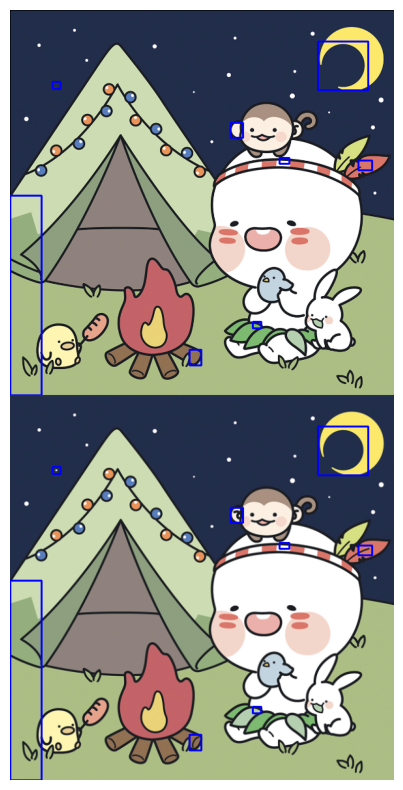

In [104]:
for contour in contours:
    if cv2.contourArea(contour) > 100:
        x, y, w, h = cv2.boundingRect(contour)
        cv2.rectangle(image1, (x, y), (x+w, y+h), (0,0,255), 2)
        cv2.rectangle(image2, (x, y), (x+w, y+h), (0,0,255), 2)

result = np.vstack((image1, image2))

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()

*Note: Better but not perfect*

## 3. Detect differences with `skimage.metrics.structural_similarity` method (1st example)

In [131]:
image1 = cv2.imread('img/img3-1.png')
image2 = cv2.imread('img/img3-2.png')

In [132]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

In [133]:
(score, diff) = structural_similarity(gray1, gray2, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

Image Similarity: 95.0710%


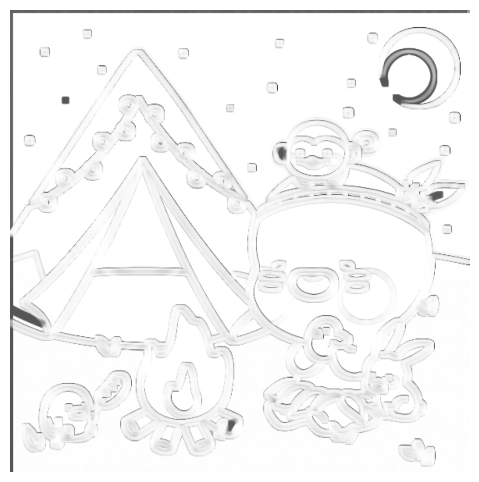

In [134]:
plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

In [135]:
diff = (diff * 255).astype('uint8')
diff_box = cv2.merge([diff, diff, diff])

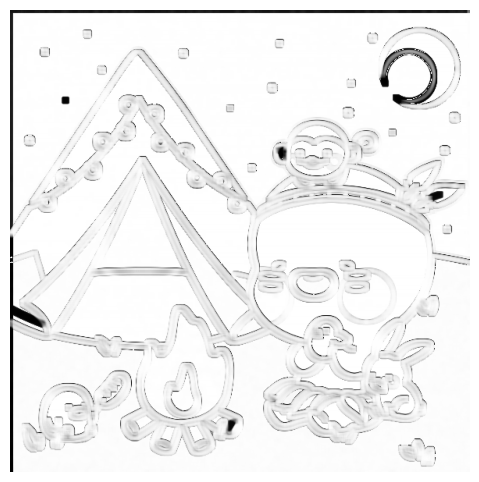

In [136]:
plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

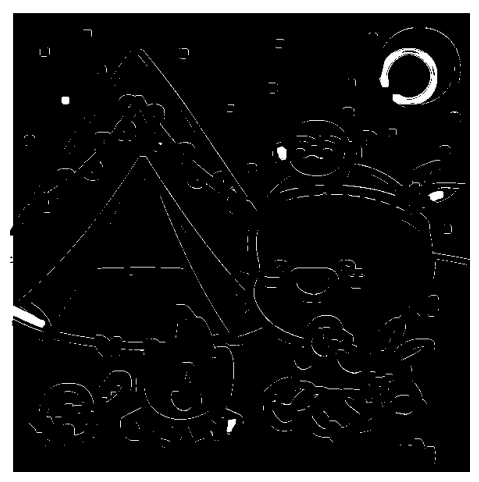

In [137]:
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [138]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

In [139]:
mask = np.zeros(image1.shape, dtype='uint8')
filled_image2 = image2.copy()

In [140]:
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

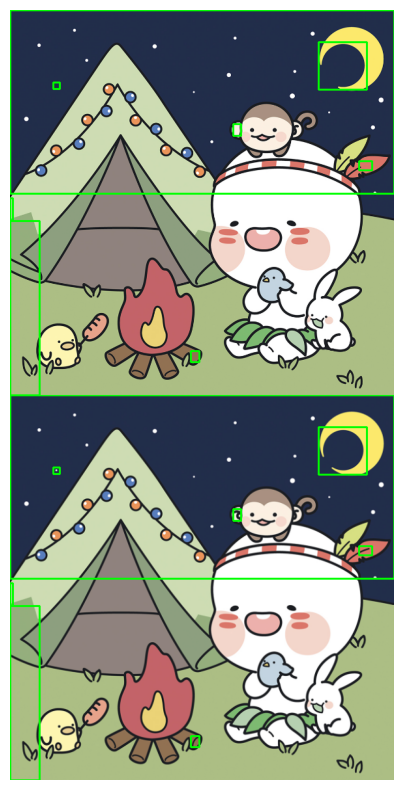

In [141]:
for c in contours:
    if cv2.contourArea(c) > 40:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(image1, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.rectangle(image2, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_image2, [c], 0, (0,255,0), -1)

result = np.vstack((image1, image2))

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()

## 4. Detect differences with `skimage.metrics.structural_similarity` method (2nd example)

In [150]:
def crop_img(img, x, y, w, h):
    return img[y:y+h, x:x+w]

In [149]:
image = cv2.imread('img/img2.jpg')

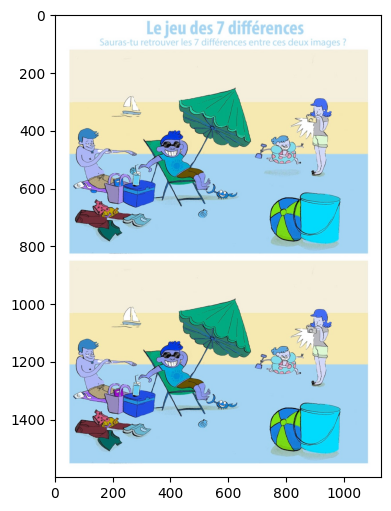

In [151]:
plt.figure(figsize=(6, 6))
plt.imshow(image)
plt.show()

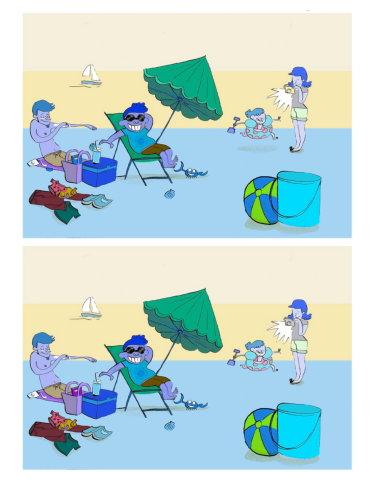

In [160]:
img_crop = crop_img(image, 10, 110, 1110, 1450)

plt.figure(figsize=(6, 6))
plt.imshow(img_crop)
plt.axis('off')
plt.show()

In [161]:
height, width, _ = img_crop.shape

In [162]:
img1 = img_crop[:height//2, :]
img2 = img_crop[height//2:, :]

In [163]:
img1.shape

(725, 1110, 3)

In [164]:
img2.shape

(725, 1110, 3)

In [165]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

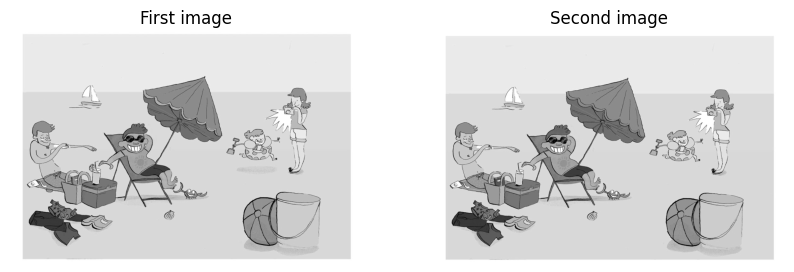

In [166]:
plt.figure(figsize=(10, 15))

plt.subplot(1, 2, 1)
plt.imshow(gray1, cmap='gray')
plt.title('First image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray2, cmap='gray')
plt.title('Second image')
plt.axis('off')

plt.show()

In [167]:
(score, diff) = structural_similarity(gray1, gray2, full=True)
print("Image Similarity: {:.4f}%".format(score * 100))

Image Similarity: 79.2034%


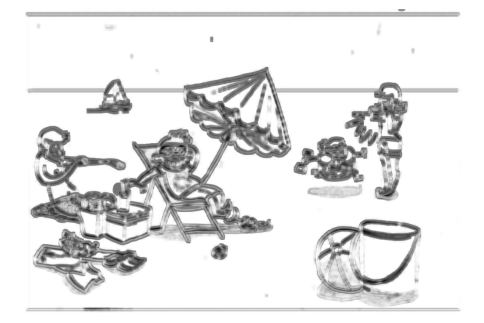

In [168]:
plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

In [169]:
diff = (diff * 255).astype('uint8')
diff_box = cv2.merge([diff, diff, diff])

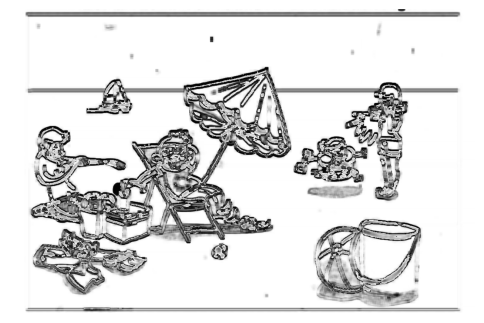

In [170]:
plt.figure(figsize=(6, 6))
plt.imshow(diff, cmap='gray')
plt.axis('off')
plt.show()

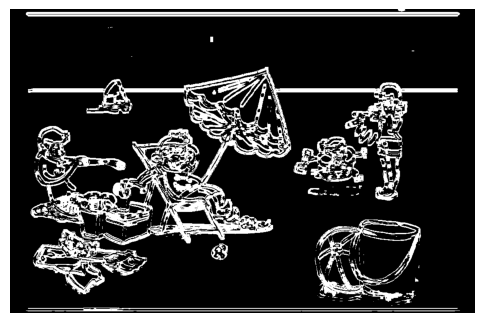

In [174]:
_, thresh = cv2.threshold(diff, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

plt.figure(figsize=(6, 6))
plt.imshow(thresh, cmap='gray')
plt.axis('off')
plt.show()

In [175]:
contours = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = contours[0] if len(contours) == 2 else contours[1]

In [176]:
mask = np.zeros(img1.shape, dtype='uint8')
filled_img2 = img2.copy()

In [177]:
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

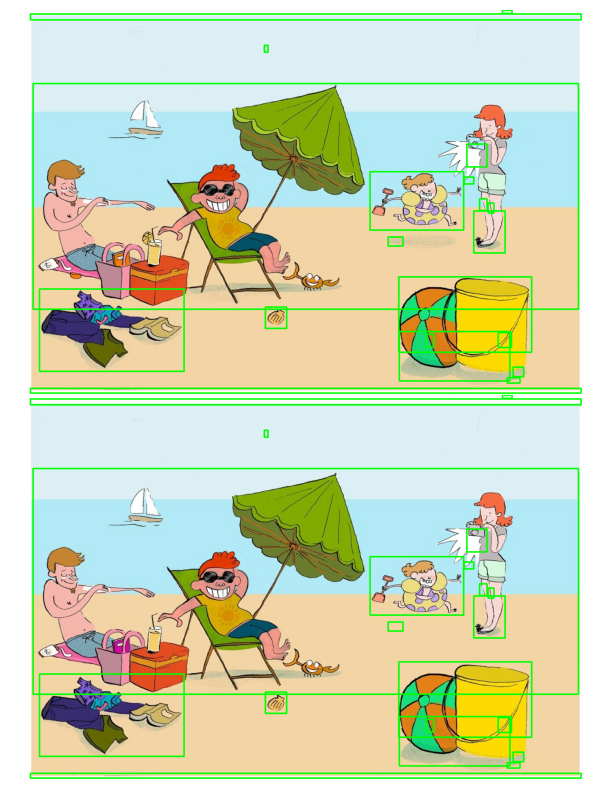

In [178]:
for c in contours:
    if cv2.contourArea(c) > 40:
        x, y, w, h = cv2.boundingRect(c)
        cv2.rectangle(img1, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.rectangle(img2, (x, y), (x+w, y+h), (0,255,0), 2)
        cv2.rectangle(diff_box, (x, y), (x + w, y + h), (36,255,12), 2)
        cv2.drawContours(mask, [c], 0, (255,255,255), -1)
        cv2.drawContours(filled_img2, [c], 0, (0,255,0), -1)

result = np.vstack((img1, img2))

plt.figure(figsize=(10, 10))
plt.imshow(result)
plt.axis('off')
plt.show()